In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import arviz as az
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 12345
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-viridish")

In [3]:
(12 + 44 + 21 + 62 + 24) / 5

32.6

In [4]:
x = np.array([12, 44, 21, 62, 24])
np.mean(x)

32.6

In [5]:
np.average(x)

32.6

In [6]:
zero_one = np.array([1, 1, 1, 0])
result = sum(zero_one)
print(result) 

3


In [7]:
np.mean(zero_one)

0.75

In [8]:
np.mean(np.array([(True, True, True, False)]))

0.75

In [9]:
df = pd.read_csv("../data/STAR.csv")
df.head()

,classtype,reading,math,graduated
0,small,578,610,1
1,regular,612,612,1
2,regular,583,606,1
3,small,661,648,1
4,small,614,636,1


In [10]:
df.groupby("graduated").size()

graduated
0     166
1    1108
dtype: int64

In [11]:
df.groupby("graduated")["math"].mean().round(2)

graduated
0    606.64
1    635.33
Name: math, dtype: float64

In [12]:
df.groupby("graduated")["math"].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
graduated,,,,,,,,
0,166.0,606.6,34.1,526.0,580.5,606.0,629.0,711.0
1,1108.0,635.3,38.1,515.0,609.5,634.0,659.0,774.0


In [13]:
not_graduated = df[df["graduated"] == 0].math
stats.trim_mean(not_graduated, 0.10)

605.6492537313433

In [14]:
graduated = df[df["graduated"] == 1].math
stats.trim_mean(graduated, 0.10)

634.4403153153153

In [15]:
# Quantili di ordine 0.1 e 0.9 per il gruppo di studenti che hanno completato la scuola superiore
[
    df[df["graduated"] == 1]["math"].quantile(0.1), 
    df[df["graduated"] == 1]["math"].quantile(0.9)
]

[588.0, 684.0]

In [16]:
# Quantili di ordine 0.1 e 0.9 per il gruppo di studenti che non hanno completato la scuola superiore
[
    df[df["graduated"] == 0]["math"].quantile(0.1),
    df[df["graduated"] == 0]["math"].quantile(0.9),
]

[564.5, 651.0]

In [17]:
sum((df["math"] - np.mean(df["math"])) ** 2) / len(df["math"])

1507.2328523125227

In [18]:
np.var(df["math"])

1507.2328523125227

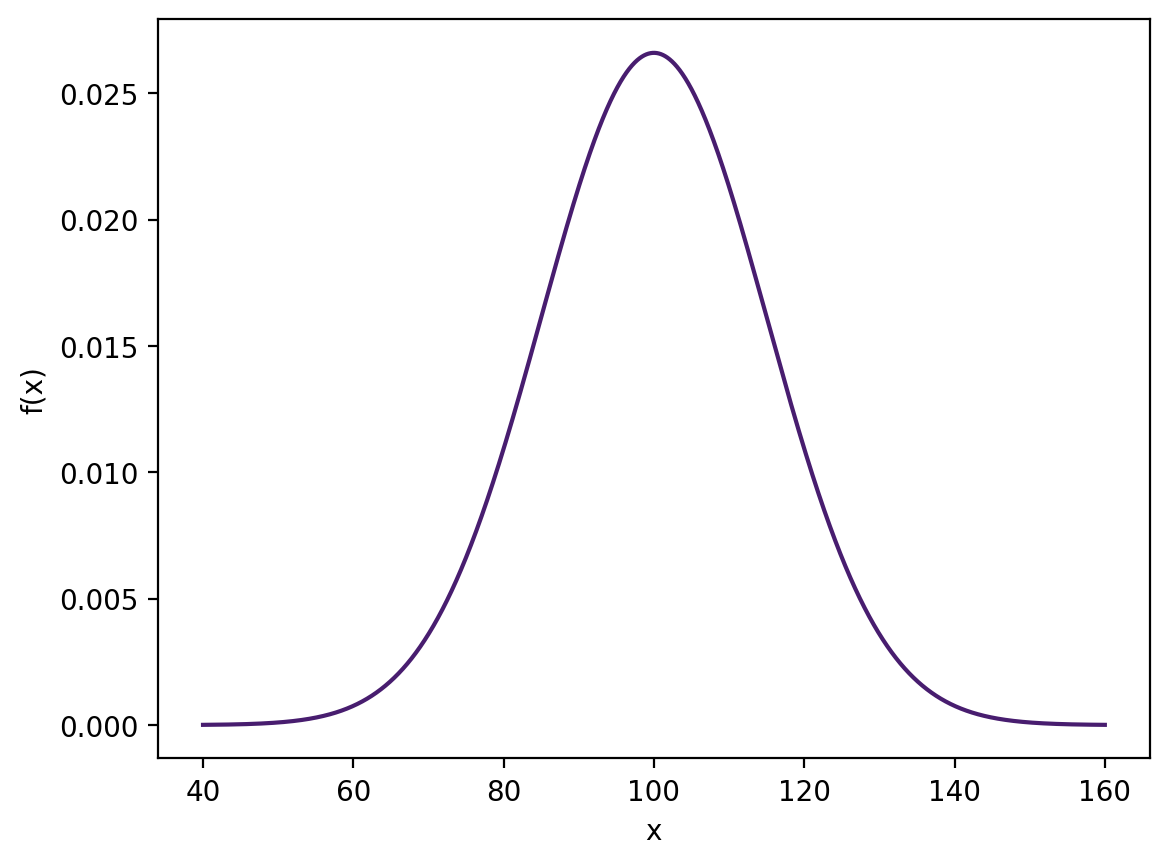

In [19]:
x = np.arange(100 - 4 * 15, 100 + 4 * 15, 0.001)

mu = 100
sigma = 15

pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [20]:
x = rng.normal(loc=100, scale=15, size=4)
print(x)

[ 78.64262445 118.95592687  86.94007393  96.11240148]


In [21]:
np.var(x)

226.88601335241407

In [22]:
mu = 100
sigma = 15
size = 4
niter = 10
random_samples = []

for i in range(niter):
    one_sample = rng.normal(loc=mu, scale=sigma, size=size)
    random_samples.append(one_sample)

In [23]:
random_samples[0]

array([ 98.86985039,  88.88673022,  79.48310947, 109.73339203])

In [24]:
random_samples[9]

array([104.69354378,  98.03782465, 119.04974681,  98.60556313])

In [25]:
rs = np.array(random_samples)
rs

array([[ 98.86985039,  88.88673022,  79.48310947, 109.73339203],
       [105.4158717 ,  70.70705405, 135.21114482, 114.52745359],
       [ 88.60919229, 113.53297411,  92.9957024 ,  99.08965722],
       [111.83266517,  81.149978  , 108.63786272, 120.98468492],
       [119.83447091,  95.50452227, 113.54379012,  75.67625899],
       [ 97.62716109, 106.74225898,  79.84598391,  98.77468614],
       [125.87109898, 139.2723914 , 111.66042016, 112.42949793],
       [ 85.6151753 ,  81.8591757 ,  78.8156198 , 108.12320245],
       [111.27909093,  90.11859521,  81.56987522, 103.86336653],
       [104.69354378,  98.03782465, 119.04974681,  98.60556313]])

In [26]:
x_var = np.var(rs, axis=1)  # applichiamo la funzione su ciascuna riga
print(x_var)

[126.97599599 542.76884186  88.61260836 220.63907623 295.87449185
  96.60998017 127.86050222 132.80934429 134.02475959  71.7031573 ]


In [27]:
mu = 100
sigma = 15
size = 4
niter = 10000
random_samples = []

for i in range(niter):
    one_sample = rng.normal(loc=mu, scale=sigma, size=size)
    random_samples.append(one_sample)

rs = np.array(random_samples)
x_var = np.var(rs, axis=1)

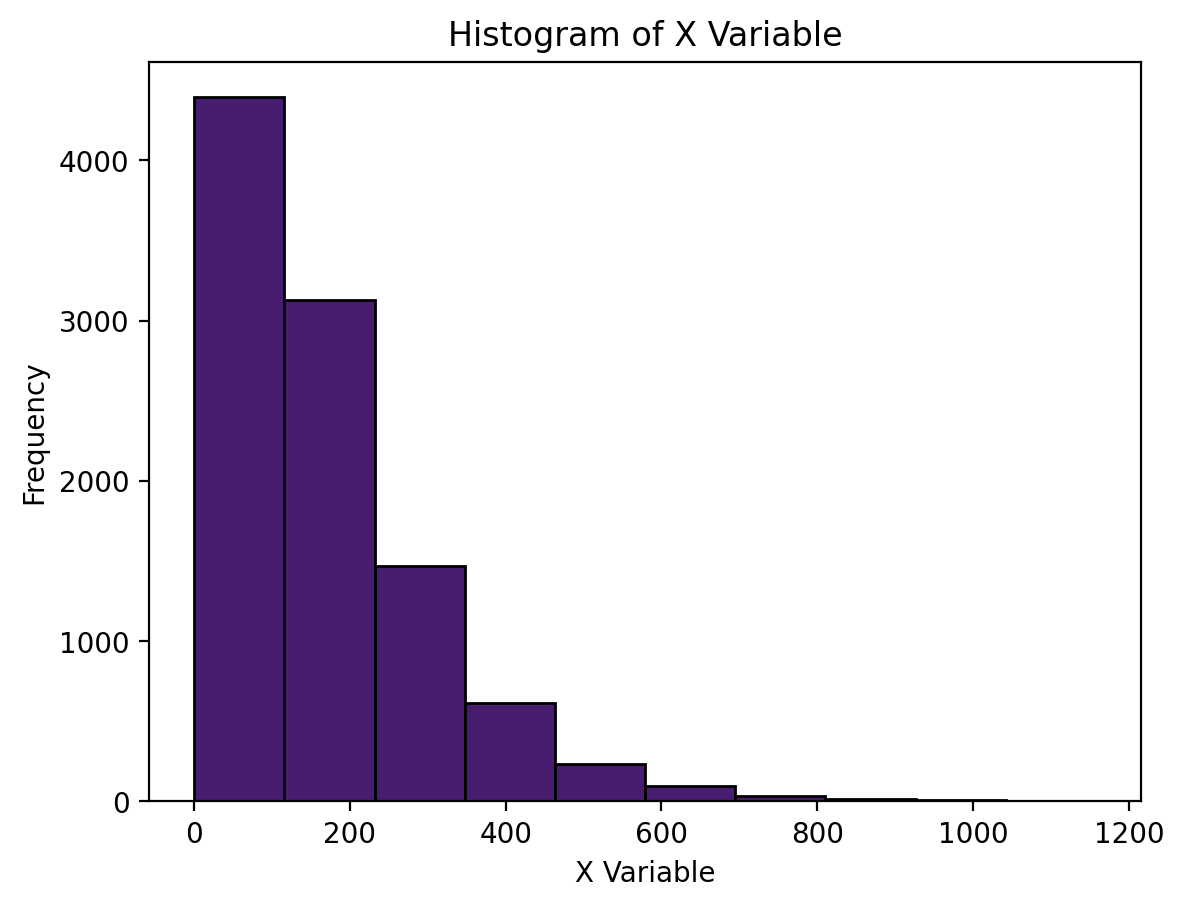

In [28]:
plt.hist(x_var, bins=10, edgecolor='black')
plt.xlabel("X Variable")
plt.ylabel("Frequency")
plt.title("Histogram of X Variable")
plt.show()

In [29]:
np.mean(x_var)

168.46237726900875

In [30]:
mu = 100
sigma = 15
size = 4
niter = 10000
random_samples = []

for i in range(niter):
    one_sample = rng.normal(loc=mu, scale=sigma, size=size)
    random_samples.append(one_sample)

rs = np.array(random_samples)
x_var = np.var(rs, ddof=1, axis=1)

np.mean(x_var)

224.39184690244988

In [31]:
np.std(df.math)

38.82309689234648

In [32]:
df.groupby("graduated")["math"].std()

graduated
0    34.105746
1    38.130136
Name: math, dtype: float64

In [33]:
np.std(df["math"])

38.82309689234648

In [34]:
np.mean(np.abs(df.math - np.mean(df.math)))

30.9682664274501

In [35]:
1.4826 * np.median(np.abs(df["math"] - np.median(df["math"])))

41.5128

In [36]:
x = np.random.normal(loc=100, scale=15, size=10000)
1.4826 * np.median(np.abs(x - np.median(x)))

15.13538014236026

In [37]:
%load_ext watermark
%watermark -n -u -v -iv -w 

Last updated: Sun Sep 17 2023

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

scipy     : 1.10.1
seaborn   : 0.12.2
matplotlib: 3.7.2
numpy     : 1.25.2
arviz     : 0.16.0
pandas    : 2.0.3

Watermark: 2.4.3

